## TEAM-EDINBURGH


Project Title - The Indian Start-Up Case

Context
The data for this project spans from 2018-2019. Our goal will be to satisfy the processes for handling the data and also provide a detailed analysis of the process using the CRISP-DM data analysis framework.

This Notebook will include conclusions on the following :

* Asking the relevant questions and stating some hypothesis.
* Cleaning the data.

Questions?

* Do companies in certain sectors tend to receive more funding than others?

* Is there a correlation between the stage of development of a company and the amount of funding it receives?

* Are companies with more founders more likely to receive larger amounts of funding?

* Are there any patterns in the location of a company's headquarters and the amount of funding it receives?

* Does the number of investors in a company tend to impact the amount of funding it receives?

* Founders: How many founders are associated with each company? What is the average number of founders?

* What are the top 10 companies with the highest funding?


Hypothesis! 

* Startups in the e-commerce and fintech sectors receive more funding compared to other sectors in India.

* There is a positive correlation between the stage of development of a company and the amount of funding it receives in India.

* Companies with a larger number of founders are more likely to receive higher amounts of funding in India.

* Startups headquartered in major metropolitan areas such as Mumbai, Bangalore, and Delhi are more likely to receive larger amounts of funding in India.

* The number of investors in a company is positively correlated with the amount of funding it receives in India.

* Is there a relationship between the sector of a company and the amount of funding it receives?

* Is there a difference in the average funding received by companies headquartered in different regions?

## Importing libraries & accessing the size and shape of the data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ind_2018 = pd.read_csv('C:\\Users\\GILBERT\\Downloads\\DAP2\Indian Start-up Project\\startup_funding2018.csv')
ind_2019 = pd.read_csv('C:\\Users\\GILBERT\\Downloads\\DAP2\\Indian Start-up Project\\startup_funding2019.csv')
ind_2020 = pd.read_csv('C:\\Users\\GILBERT\\Downloads\\DAP2\\Indian Start-up Project\\startup_funding2020.csv')
ind_2021 = pd.read_csv('C:\\Users\\GILBERT\\Downloads\\DAP2\\Indian Start-up Project\\startup_funding2021.csv')

In [3]:
ind_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [4]:
ind_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [5]:
ind_2018.isna().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

## Filtering the data ,replacing and rename values & a date series(random)

In [6]:
ind_2018['Year']=2018
ind_2018['Founded']='NaN'
ind_2018= ind_2018.rename(columns={'Company Name': 'Company/Brand'})
ind_2018= ind_2018.rename(columns={'Industry': 'Sector'})
ind_2018= ind_2018.rename(columns={'Location': 'HeadQuarter'})
ind_2018= ind_2018.rename(columns={'Amount': 'Amount($)'})
ind_2018= ind_2018.rename(columns={'Round/Series': 'Stage'})
ind_2018.drop('About Company',axis=1,inplace=True)

In [7]:
# replace empty values with NaN
ind_2018['Sector'].replace('—', pd.np.nan, inplace=True)

C:\Users\GILBERT\AppData\Local\Temp\ipykernel_12036\2826083760.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ind_2018['Sector'].replace('—', pd.np.nan, inplace=True)


In [8]:
ind_2018.loc[58, 'Sector'] = 'Entertainment'
ind_2018.loc[105, 'Sector'] = 'Finance'
ind_2018.loc[121, 'Sector'] = 'Automotive'
ind_2018.loc[146, 'Sector'] = 'Automotive'
ind_2018.loc[153, 'Sector'] = 'Food'
ind_2018.loc[174, 'Sector'] = 'Technology'
ind_2018.loc[181, 'Sector'] = 'Finance'
ind_2018.loc[210, 'Sector'] = 'Automotive'
ind_2018.loc[230, 'Sector'] = 'Real Estate'
ind_2018.loc[235, 'Sector'] = 'Technology'
ind_2018.loc[238, 'Sector'] = 'Technology'
ind_2018.loc[242, 'Sector'] = 'Real Estate'
ind_2018.loc[243, 'Sector'] = 'Technology'
ind_2018.loc[247, 'Sector'] = 'Technology'
ind_2018.loc[251, 'Sector'] = 'Wellness'
ind_2018.loc[257, 'Sector'] = 'Marketing'
ind_2018.loc[258, 'Sector'] = 'Marketing'
ind_2018.loc[259, 'Sector'] = 'E-Commerce'
ind_2018.loc[257, 'Sector'] = 'Marketing'
ind_2018.loc[294, 'Sector'] = 'Transportation'
ind_2018.loc[325, 'Sector'] = 'Technology'
ind_2018.loc[326, 'Sector'] = 'Finance'
ind_2018.loc[346, 'Sector'] = 'Finance'
ind_2018.loc[398, 'Sector'] = 'Finance'
ind_2018.loc[457, 'Sector'] = 'Agriculture'
ind_2018.loc[472, 'Sector'] = 'Technology'
ind_2018.loc[473, 'Sector'] = 'Technology'
ind_2018.loc[476, 'Sector'] = 'Technology'
ind_2018.loc[478, 'Sector'] = 'Wellness/Beauty'
ind_2018.loc[480, 'Sector'] = 'Hospitality'
ind_2018.loc[510, 'Sector'] = 'Technology'

In [9]:
ind_2018.head(511)

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,Year,Founded
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India",2018,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",2018,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",2018,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",2018,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",2018,NaN
...,...,...,...,...,...,...,...
506,Verzeo,E-Learning,Series A,5000000,"Bangalore, Karnataka, India",2018,NaN
507,Haazri,"Food and Beverage, Snack Food, Tea",Seed,"₹12,500,000","Mumbai, Maharashtra, India",2018,NaN
508,Connect India,"Delivery Service, E-Commerce, Logistics",Angel,—,"New Delhi, Delhi, India",2018,NaN
509,Flyrobe,"Fashion, Lifestyle, Rental",Series B,"₹264,000,000","Mumbai, Maharashtra, India",2018,NaN


In [10]:
ind_2018.isna().sum()

Company/Brand    0
Sector           0
Stage            0
Amount($)        0
HeadQuarter      0
Year             0
Founded          0
dtype: int64

## Filling the anomalies in this column by containing the valid values and replacing the missing values

In [11]:
# # create a DatetimeIndex with dates for the entire year
date_range = pd.date_range(start='2018-01-01', end='2018-12-31', freq='D')

# # create a new column 'Date' with random dates within the year 2018
ind_2018['Date'] = np.random.choice(date_range, size=len(ind_2018))

ind_2018 = ind_2018.sort_values('Date')

ind_2018['Date'] = pd.to_datetime(ind_2018['Date'], format='%Y-%m-%d')


In [12]:
ind_2018.set_index('Date',inplace=True)

## Changing the shape of the amount col & currency(rates conidered),filling the missing values with mean of the column.

In [13]:
def convert_to_dollars(value):
    if pd.isnull(value):
        return np.nan
    elif isinstance(value, float):
        return str(value)
    elif '$' in value:
        return value
    elif '₹' in value:
        return '$' + str(round(float(value.split('₹')[1].replace(',', '')) / 68.44, 2))
    else:
        return '$' + str(float(value) / 68.44)


# convert values in 'Amount($)' column to strings
ind_2018['Amount($)'] = ind_2018['Amount($)'].astype(str)

ind_2018['Amount($)'] = ind_2018['Amount($)'].str.replace('[^\d\.]', '')

ind_2018['Amount($)'].replace('', np.nan, inplace=True)

ind_2018['Amount($)'] = ind_2018['Amount($)'].astype(float)

ind_2018['Amount($)'] = ind_2018['Amount($)'].apply(convert_to_dollars)


C:\Users\GILBERT\AppData\Local\Temp\ipykernel_12036\4169188906.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
  ind_2018['Amount($)'] = ind_2018['Amount($)'].str.replace('[^\d\.]', '')


In [14]:
# # convert the 'Amount' column to a numeric data type
ind_2018['Amount($)'] = pd.to_numeric(ind_2018['Amount($)'])
ind_2018['Amount($)'] = pd.to_numeric(ind_2018['Amount($)'])

In [15]:
ind_2018.describe()

,Amount($),Year
count,3.780000e+02,526.0
mean,2.391683e+08,2018.0
std,1.374900e+09,0.0
min,7.500000e+03,2018.0
25%,1.000000e+06,2018.0
50%,5.800000e+06,2018.0
75%,5.000000e+07,2018.0
max,2.000000e+10,2018.0


In [16]:
ind_2018.duplicated()

Date
2018-01-03    False
2018-01-03    False
2018-01-03    False
2018-01-04    False
2018-01-06    False
              ...  
2018-12-30    False
2018-12-30    False
2018-12-31    False
2018-12-31    False
2018-12-31    False
Length: 526, dtype: bool

In [17]:
ind_2018.isna().sum()

Company/Brand      0
Sector             0
Stage              0
Amount($)        148
HeadQuarter        0
Year               0
Founded            0
dtype: int64

In [18]:
ind_2018.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,Year,Founded
Date,,,,,,,
2018-01-03,Flathalt,Real Estate,Angel,50000.0,"Gurgaon, Haryana, India",2018,NaN
2018-01-03,Mihuru,"Finance, Internet, Travel",Seed,150000.0,"Mumbai, Maharashtra, India",2018,NaN
2018-01-03,Pooltoo,Transportation,Seed,NaN,"New Delhi, Delhi, India",2018,NaN
2018-01-04,Taru Naturals,"Agriculture, Farming",Seed,NaN,"Mumbai, Maharashtra, India",2018,NaN
2018-01-06,Trell,Technology,Seed,1250000.0,"Bangalore City, Karnataka, India",2018,NaN


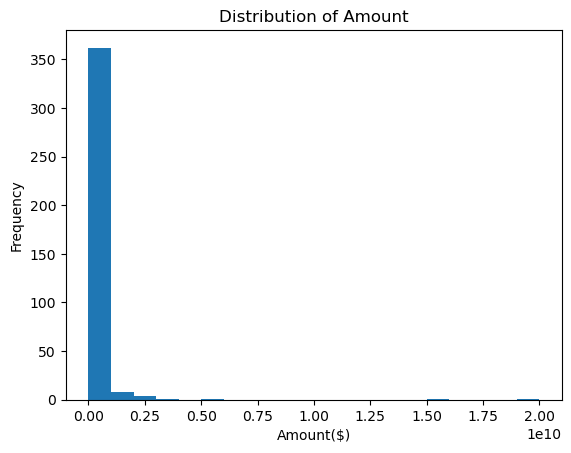

In [19]:
# Create a histogram of the 'Amount' column
plt.hist(ind_2018['Amount($)'], bins=20)
plt.title('Distribution of Amount')
plt.xlabel('Amount($)')
plt.ylabel('Frequency')
plt.show()

In [20]:
ind_2018['Amount($)'] = ind_2018['Amount($)'].fillna(ind_2018['Amount($)'].median())

In [21]:
ind_2018['Amount($)'] = ind_2018['Amount($)'].astype(int)

In [22]:
ind_2018.isna().sum()

Company/Brand    0
Sector           0
Stage            0
Amount($)        0
HeadQuarter      0
Year             0
Founded          0
dtype: int64

In [23]:
ind_2018.head(100)

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,Year,Founded
Date,,,,,,,
2018-01-03,Flathalt,Real Estate,Angel,50000,"Gurgaon, Haryana, India",2018,NaN
2018-01-03,Mihuru,"Finance, Internet, Travel",Seed,150000,"Mumbai, Maharashtra, India",2018,NaN
2018-01-03,Pooltoo,Transportation,Seed,5800000,"New Delhi, Delhi, India",2018,NaN
2018-01-04,Taru Naturals,"Agriculture, Farming",Seed,5800000,"Mumbai, Maharashtra, India",2018,NaN
2018-01-06,Trell,Technology,Seed,1250000,"Bangalore City, Karnataka, India",2018,NaN
...,...,...,...,...,...,...,...
2018-03-17,Idha Skin Clinic,"Beauty, Cosmetics, Health Care, Service Industry",Seed,5000000,"Bangalore City, Karnataka, India",2018,NaN
2018-03-18,Buddy4Study.com,"Career Planning, Education, Higher Education, ...",Series A,3000000,"Noida, Uttar Pradesh, India",2018,NaN
2018-03-18,SectorQube,"Consumer Electronics, Embedded Systems, Hardwa...",Seed,5800000,"Ernakulam, Kerala, India",2018,NaN


## Replacing missing values in stage & Founded col / filtering headquater col / filtering the sector col by closing them in related col by using str.contain

In [24]:
valid_stages = ['Venture - Series Unknown','Seed', 'Angel', 'Series A', 'Series B', 'Pre-Seed', 'Grant', 'Series H', 
                'Series A', 'Series C', 'Series E', 'Corporate Round','Series D','Debt financing','Post-IPO Equity']

ind_2018.loc[~ind_2018['Stage'].isin(valid_stages), 'Stage'] = np.nan

In [25]:
mode_value = ind_2018['Stage'].mode()[0]
print(mode_value)

Seed


In [26]:
ind_2018['Stage'] = ind_2018['Stage'].fillna(ind_2018['Stage'].mode()[0])
ind_2018['Founded'] = ind_2018['Founded'].replace('NaN', np.nan)

In [27]:
ind_2018.head(100)

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,Year,Founded
Date,,,,,,,
2018-01-03,Flathalt,Real Estate,Angel,50000,"Gurgaon, Haryana, India",2018,NaN
2018-01-03,Mihuru,"Finance, Internet, Travel",Seed,150000,"Mumbai, Maharashtra, India",2018,NaN
2018-01-03,Pooltoo,Transportation,Seed,5800000,"New Delhi, Delhi, India",2018,NaN
2018-01-04,Taru Naturals,"Agriculture, Farming",Seed,5800000,"Mumbai, Maharashtra, India",2018,NaN
2018-01-06,Trell,Technology,Seed,1250000,"Bangalore City, Karnataka, India",2018,NaN
...,...,...,...,...,...,...,...
2018-03-17,Idha Skin Clinic,"Beauty, Cosmetics, Health Care, Service Industry",Seed,5000000,"Bangalore City, Karnataka, India",2018,NaN
2018-03-18,Buddy4Study.com,"Career Planning, Education, Higher Education, ...",Series A,3000000,"Noida, Uttar Pradesh, India",2018,NaN
2018-03-18,SectorQube,"Consumer Electronics, Embedded Systems, Hardwa...",Seed,5800000,"Ernakulam, Kerala, India",2018,NaN


In [28]:
ind_2018.isna().sum()

Company/Brand      0
Sector             0
Stage              0
Amount($)          0
HeadQuarter        0
Year               0
Founded          526
dtype: int64

In [29]:
# Split the Headquarters column by comma, and keep only the first value
ind_2018["City"] = ind_2018["HeadQuarter"].apply(lambda x: x.split(",")[0])

In [30]:
ind_2018.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,Year,Founded,City
Date,,,,,,,,
2018-01-03,Flathalt,Real Estate,Angel,50000,"Gurgaon, Haryana, India",2018,NaN,Gurgaon
2018-01-03,Mihuru,"Finance, Internet, Travel",Seed,150000,"Mumbai, Maharashtra, India",2018,NaN,Mumbai
2018-01-03,Pooltoo,Transportation,Seed,5800000,"New Delhi, Delhi, India",2018,NaN,New Delhi
2018-01-04,Taru Naturals,"Agriculture, Farming",Seed,5800000,"Mumbai, Maharashtra, India",2018,NaN,Mumbai
2018-01-06,Trell,Technology,Seed,1250000,"Bangalore City, Karnataka, India",2018,NaN,Bangalore City


In [31]:
ind_2018.drop('HeadQuarter',axis=1,inplace=True)

In [32]:
ind_2018 = ind_2018.rename(columns={'City': 'HeadQuarter'})

In [33]:
# replace "Bengaluru" with "Bangalore" in the "headquarter" column
ind_2018['HeadQuarter'] = ind_2018['HeadQuarter'].str.replace('Bengaluru', 'Bangalore')

In [34]:
ind_2018.isna().sum()

Company/Brand      0
Sector             0
Stage              0
Amount($)          0
Year               0
Founded          526
HeadQuarter        0
dtype: int64

In [35]:
tech = ['Mobile','Technology', 'Internet', 'Software', 'Hardware','SaaS','Blockchain','Apps','Information Services','SEM',
        'Artificial Intelligence','CleanTech','Aerospace','Robotics','Ai','PaaS','Medtech','Agritech','HR tech',
       'Tech','FoodTech','Safety tech','IoT','Legal tech','Infratech','Netwokring platform','Telecommunication','Cloud','Aero',
       'Virtual','Content','Photonics','app','Proptech','Deeptech','AR','VR','Agri tech','-Tech','AgriTech','IT','Network',
        'Data','HrTech','Foodtech','Spacetech','E-mobility','Automation','Logitech','HRTech','Drone','MLOps','Innovation',
       'BioTechnology','TaaS','network','equipment','SpaceTech','CRM','MarTech','Nanotechnology','Femtech','startup','AI']
fin = ['Lending','Finance','Insurance', 'Payments','Financial Services','Credit','Credit Cards','Mutual Funds',
       'Banking','Escrow','Venture','financial','Taxation','Capital','firm','Equity']
fint = ['NFT','Virtual Banking','FinTech','Fintech','Cryptocurrency','Crypto','Insurtech','InsurTech']
health = ['Health', 'Medical','Pharmaceutical','Health Diagnotics','Health Care','Hospital','Biotechnology','Biopharma',
         'Hygiene management','HealthTech','Healthcare','HealthCare','laboratory','Biotech','Healthtech','HeathTech',
         'Helathcare','Veterinary']
mkt = ['Brand Marketing','Marketing','Event Promotion','Market']
agric = ['Farming','Agriculture','Nutrition','Hauz Khas','Fishery']
con = ['Food','Food and Beverages','Dairy','Beverages','Beer','FMCG']
econ = ['B2B','Shopping','E-Commerce','Trading Platform','E-commerce','E-marketplace','marketplace','e-commerce','Ecommerce',
        'E-market','Commerce','Trading platform']
cons = ['Wholesale','Consumer','Shoes','Packaging','Retail','Consulting','Food Delivery']
edu = ['E-Learning','EdTech','Education','Communities','Edtech','Preschool','School']
welln = ['Lifestyle','Beauty','Wellness','Cosmetics','Yoga','Skincare','D2C','Fitness','Lifestyle','Training']
real_est=['Real Estate','Home Decor','Accomodation','Interior design','Home Design','Home interior','Co-living',
          'Construction']
log = ['Logistics','Rental','Tourism','Travel','TravelTech','Transport','Transportation','Aviation','Mobility']

auto = ['Automotive','Electric vehicle','Industrial Automation','Vehicles','Automotive tech','Automobile','Tyre','car','Car',
       'Vehicle','Mechanical']
manu = ['Manufacturing']
ener = ['Renewable Energy','Solar','Energy','Energy Storage','Battery','Oil and Gas','Renewable','EV','Electricity',
       'purification','Renewables']
medi = ['Entertainment','Media','News','Video','Digital Media','FM','Publication','OTT','Social Network','Music',
        'Digital platform','Podcast','publishing','Blogging']
game = ['Gaming','Games','Sports']

style = ['Fashion','Jewelry','Eyeglasses','Eye Wear','Apparel','Dating','Celebrity','Eyewear','D2C Fashion','Matrimony',
         'Textiles','D2C jewellery','Foootwear','Arts']
hos =['Hospitality','Hotel','Leisure']



ind_2018['Sector_clean'] = 'Other'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(tech)), 'Sector_clean'] = 'Technology'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(fin)), 'Sector_clean'] = 'Finance'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(health)), 'Sector_clean'] = 'Healthcare'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(mkt)), 'Sector_clean'] = 'Marketing'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(agric)), 'Sector_clean'] = 'Agriculture'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(econ)), 'Sector_clean'] = 'E-Commerce'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(edu)), 'Sector_clean'] = 'Education'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(welln)), 'Sector_clean'] = 'Wellness/Beauty'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(real_est)), 'Sector_clean'] = 'Real Estate'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(log)), 'Sector_clean'] = 'Logistics'

ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(auto)), 'Sector_clean'] = 'Automotive'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(manu)), 'Sector_clean'] = 'Manufacture'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(ener)), 'Sector_clean'] = 'Energy'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(medi)), 'Sector_clean'] = 'Media/Entertainment'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(hos)), 'Sector_clean'] = 'Hospitality'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(style)), 'Sector_clean'] = 'Lifestyle'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(cons)), 'Sector_clean'] = 'Consumer Services'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(game)), 'Sector_clean'] = 'Gaming'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(fint)), 'Sector_clean'] = 'FinTech'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(con)), 'Sector_clean'] = 'Consumables'

In [36]:
ind_2018.drop('Sector',axis=1,inplace=True)

In [37]:
ind_2018= ind_2018.rename(columns={'Sector_clean': 'Sector'})

In [38]:
ind_2018.head()

,Company/Brand,Stage,Amount($),Year,Founded,HeadQuarter,Sector
Date,,,,,,,
2018-01-03,Flathalt,Angel,50000,2018,NaN,Gurgaon,Real Estate
2018-01-03,Mihuru,Seed,150000,2018,NaN,Mumbai,Logistics
2018-01-03,Pooltoo,Seed,5800000,2018,NaN,New Delhi,Logistics
2018-01-04,Taru Naturals,Seed,5800000,2018,NaN,Mumbai,Agriculture
2018-01-06,Trell,Seed,1250000,2018,NaN,Bangalore City,Technology


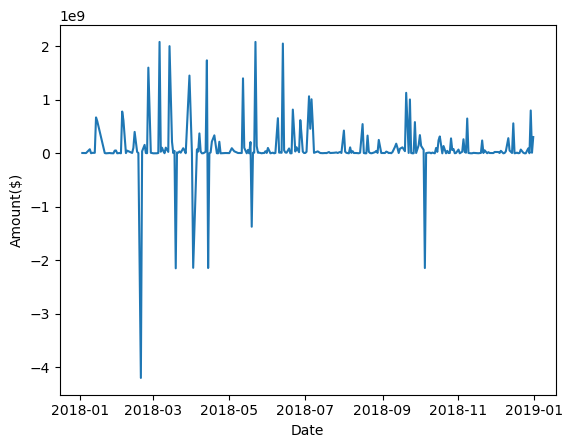

In [39]:
import seaborn as sns

# Plot a line chart of funding amounts over time
funding_over_time = ind_2018.groupby('Date')['Amount($)'].sum().reset_index()
sns.lineplot(data=funding_over_time, x='Date', y='Amount($)')
plt.show()


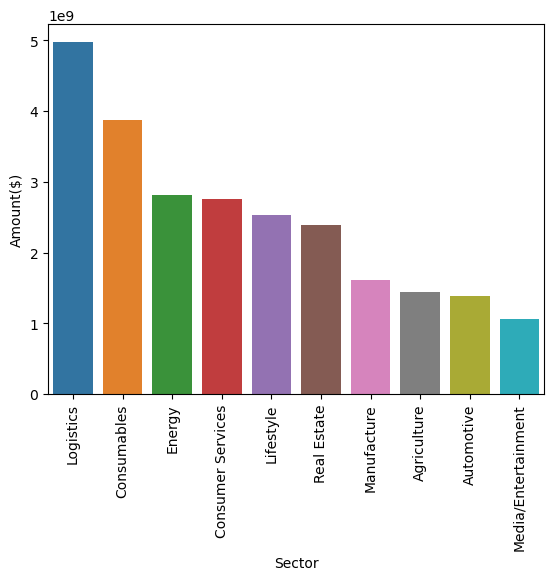

In [40]:
if ind_2018.empty:
    print("No data found for the year 2018")
else:
    # Calculate the total funding by sector
    total_funding_by_sector = ind_2018.groupby('Sector')['Amount($)'].sum().reset_index()

    top_10_sectors = total_funding_by_sector.sort_values(by='Amount($)', ascending=False).head(10)

    ax = sns.barplot(data=top_10_sectors, x='Sector', y='Amount($)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()


## Accessing the shape of the data, Filling the missing the val with statistical means,Dropping columns,Creating a date series

In [42]:
ind_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [43]:
ind_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [44]:
ind_2019.describe()

,Founded
count,60.000000
mean,2014.533333
std,2.937003
min,2004.000000
25%,2013.000000
50%,2015.000000
75%,2016.250000
max,2019.000000


In [45]:
ind_2019.isna().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

In [46]:
ind_2019.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
84    False
85    False
86    False
87    False
88    False
Length: 89, dtype: bool

In [47]:
ind_2019['Sector'].replace('—', pd.np.nan, inplace=True)

ind_2019['Year']=2019

C:\Users\GILBERT\AppData\Local\Temp\ipykernel_12036\4162604990.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ind_2019['Sector'].replace('—', pd.np.nan, inplace=True)


In [48]:
ind_2019.isna().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
Year              0
dtype: int64

In [49]:
ind_2019.loc[41, 'Sector'] = 'Media'
ind_2019.loc[49, 'Sector'] = 'Human Resources'
ind_2019.loc[52, 'Sector'] = 'Technology'
ind_2019.loc[56, 'Sector'] = 'Technology'
ind_2019.loc[57, 'Sector'] = 'E-Commerce'

In [50]:
ind_2019.drop('What it does',axis=1,inplace=True)

In [51]:
# # create a DatetimeIndex with dates for the entire year
date_range = pd.date_range(start='2019-01-01', end='2019-12-31', freq='D')

# # create a new column 'Date' with random dates within the year 2018
ind_2019['Date'] = np.random.choice(date_range, size=len(ind_2019))

ind_2019 = ind_2019.sort_values('Date')

ind_2019['Date'] = pd.to_datetime(ind_2019['Date'], format='%Y-%m-%d')

In [52]:
ind_2019.set_index('Date',inplace=True)

In [53]:
mode_value = ind_2019['Founders'].mode()[0]
print(mode_value)

mode_value = ind_2019['HeadQuarter'].mode()[0]
print(mode_value)

mode_value = ind_2019['Stage'].mode()[0]
print(mode_value)

Vivek Gupta, Abhay Hanjura
Bangalore
Series A


In [54]:
ind_2019['HeadQuarter'] = ind_2019['HeadQuarter'].fillna(ind_2019['HeadQuarter'].mode()[0])
ind_2019['Stage'] = ind_2019['Stage'].fillna(ind_2019['Stage'].mode()[0])
ind_2019['Founders'] = ind_2019['Founders'].fillna(ind_2019['Founders'].mode()[0])

## Using Statiscal means to fill the missing values in the founded column

In [55]:
ind_2019['Founded'] = pd.to_numeric(ind_2019['Founded'], errors='coerce')

In [56]:
ind_2019['Founded'] = ind_2019['Founded'].fillna(0)

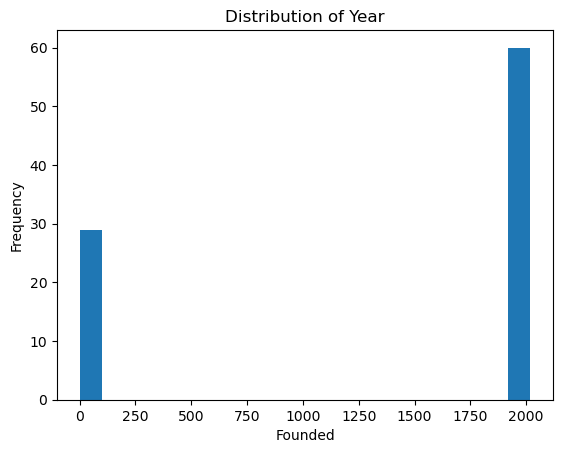

In [57]:
plt.hist(ind_2019['Founded'], bins=20)
plt.title('Distribution of Year')
plt.xlabel('Founded')
plt.ylabel('Frequency')
plt.show()

In [58]:
ind_2019['Founded'].replace(0, np.nan, inplace=True)

In [59]:
ind_2019.isna().sum()

Company/Brand     0
Founded          29
HeadQuarter       0
Sector            0
Founders          0
Investor          0
Amount($)         0
Stage             0
Year              0
dtype: int64

In [60]:
ind_2019['Founded'].fillna(ind_2019['Founded'].median(), inplace=True)

In [61]:
ind_2019['Founded'] = ind_2019['Founded'].astype(int)

## Restructuring the shape of the column & using statistical means to fill them, Restructuring the name convention of the sector column by containing it in a list of substrings and assigning it to name. 

In [62]:
ind_2019['Amount($)'].replace('', pd.np.nan, inplace=True)

C:\Users\GILBERT\AppData\Local\Temp\ipykernel_12036\1514532099.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ind_2019['Amount($)'].replace('', pd.np.nan, inplace=True)


In [63]:
ind_2019['Amount($)'] = ind_2019['Amount($)'].str.replace('[^\d\.]', '')

C:\Users\GILBERT\AppData\Local\Temp\ipykernel_12036\661071711.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  ind_2019['Amount($)'] = ind_2019['Amount($)'].str.replace('[^\d\.]', '')


In [64]:
ind_2019['Amount($)'] = pd.to_numeric(ind_2019['Amount($)'])
ind_2019['Amount($)'] = pd.to_numeric(ind_2019['Amount($)'])

In [65]:
ind_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Year
Date,,,,,,,,,
2019-01-06,Sportido,2015,Noida,Sports,"Neeraj Aggarwala, Akhil Ramachandran","Inflection Point Ventures, SucSEED Venture Par...",NaN,Series B,2019
2019-01-07,IndyFint,2019,Bangalore,Virtual Banking,Paddy Padmanabhan,Saravanan Adiseshan,2100000.0,Series A,2019
2019-01-08,CarDekho,2008,Jaipur,Automobile,Amit Jain,"Ping An Global Voyager Fund, Hillhouse Capital...",70000000.0,Series D,2019
2019-01-14,Witblox,2014,Bangalore,Edtech,Amit Modi,Mumbai Angels Network,182700.0,Series A,2019
2019-01-16,Licious,2015,Bangalore,Food,"Vivek Gupta, Abhay Hanjura",Vertex Ventures,25000000.0,Series D,2019


In [66]:
ind_2019.isna().sum()

Company/Brand     0
Founded           0
HeadQuarter       0
Sector            0
Founders          0
Investor          0
Amount($)        12
Stage             0
Year              0
dtype: int64

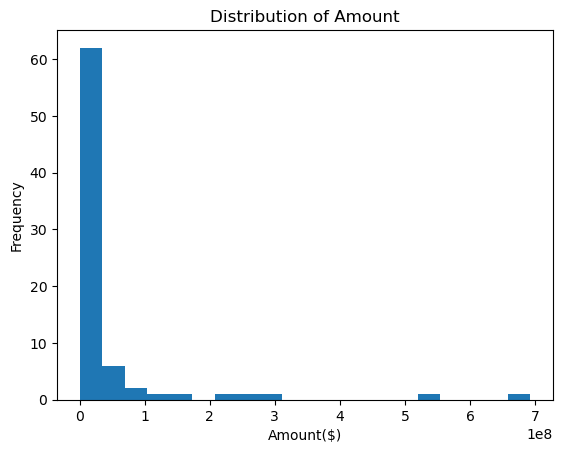

In [67]:
# Create a histogram of the 'Amount' column
plt.hist(ind_2019['Amount($)'], bins=20)
plt.title('Distribution of Amount')
plt.xlabel('Amount($)')
plt.ylabel('Frequency')
plt.show()

In [68]:
ind_2019['Amount($)'] = ind_2019['Amount($)'].fillna(ind_2019['Amount($)'].median())

In [69]:
ind_2019['Amount($)'] = ind_2019['Amount($)'].astype(int)

In [70]:
ind_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Year
Date,,,,,,,,,
2019-01-06,Sportido,2015,Noida,Sports,"Neeraj Aggarwala, Akhil Ramachandran","Inflection Point Ventures, SucSEED Venture Par...",6000000,Series B,2019
2019-01-07,IndyFint,2019,Bangalore,Virtual Banking,Paddy Padmanabhan,Saravanan Adiseshan,2100000,Series A,2019
2019-01-08,CarDekho,2008,Jaipur,Automobile,Amit Jain,"Ping An Global Voyager Fund, Hillhouse Capital...",70000000,Series D,2019
2019-01-14,Witblox,2014,Bangalore,Edtech,Amit Modi,Mumbai Angels Network,182700,Series A,2019
2019-01-16,Licious,2015,Bangalore,Food,"Vivek Gupta, Abhay Hanjura",Vertex Ventures,25000000,Series D,2019


In [71]:
ind_2019.isna().sum()

Company/Brand    0
Founded          0
HeadQuarter      0
Sector           0
Founders         0
Investor         0
Amount($)        0
Stage            0
Year             0
dtype: int64

In [72]:
# # Create a list of substrings to search for in the Sector column
tech = ['Mobile','Technology', 'Internet', 'Software', 'Hardware','SaaS','Blockchain','Apps','Information Services','SEM',
        'Artificial Intelligence','CleanTech','Aerospace','Robotics','Ai','PaaS','Medtech','Agritech','HR tech',
       'Tech','FoodTech','Safety tech','IoT','Legal tech','Infratech','Netwokring platform','Telecommunication','Cloud','Aero',
       'Virtual','Content','Photonics','app','Proptech','Deeptech','AR','VR','Agri tech','-Tech','AgriTech','IT','Network',
        'Data','HrTech','Foodtech','Spacetech','E-mobility','Automation','Logitech','HRTech','Drone','MLOps','Innovation',
       'BioTechnology','TaaS','network','equipment','SpaceTech','CRM','MarTech','Nanotechnology','Femtech','startup','AI']
fin = ['Lending','Finance','Insurance', 'Payments','Financial Services','Credit','Credit Cards','Mutual Funds',
       'Banking','Escrow','Venture','financial','Taxation','Capital','firm','Equity']
fint = ['NFT','Virtual Banking','FinTech','Fintech','Cryptocurrency','Crypto','Insurtech','InsurTech']
health = ['Health', 'Medical','Pharmaceutical','Health Diagnotics','Health Care','Hospital','Biotechnology','Biopharma',
         'Hygiene management','HealthTech','Healthcare','HealthCare','laboratory','Biotech','Healthtech','HeathTech',
         'Helathcare','Veterinary']
mkt = ['Brand Marketing','Marketing','Event Promotion','Market']
agric = ['Farming','Agriculture','Nutrition','Hauz Khas','Fishery']
con = ['Food','Food and Beverages','Dairy','Beverages','Beer','FMCG']
econ = ['B2B','Shopping','E-Commerce','Trading Platform','E-commerce','E-marketplace','marketplace','e-commerce','Ecommerce',
        'E-market','Commerce','Trading platform']
cons = ['Wholesale','Consumer','Shoes','Packaging','Retail','Consulting','Food Delivery']
edu = ['E-Learning','EdTech','Education','Communities','Edtech','Preschool','School']
welln = ['Lifestyle','Beauty','Wellness','Cosmetics','Yoga','Skincare','D2C','Fitness','Lifestyle','Training']
real_est=['Real Estate','Home Decor','Accomodation','Interior design','Home Design','Home interior','Co-living',
          'Construction']
log = ['Logistics','Rental','Tourism','Travel','TravelTech','Transport','Transportation','Aviation','Mobility']

auto = ['Automotive','Electric vehicle','Industrial Automation','Vehicles','Automotive tech','Automobile','Tyre','car','Car',
       'Vehicle','Mechanical']
manu = ['Manufacturing']
ener = ['Renewable Energy','Solar','Energy','Energy Storage','Battery','Oil and Gas','Renewable','EV','Electricity',
       'purification','Renewables']
medi = ['Entertainment','Media','News','Video','Digital Media','FM','Publication','OTT','Social Network','Music',
        'Digital platform','Podcast','publishing','Blogging']
game = ['Gaming','Games','Sports']

style = ['Fashion','Jewelry','Eyeglasses','Eye Wear','Apparel','Dating','Celebrity','Eyewear','D2C Fashion','Matrimony',
         'Textiles','D2C jewellery','Foootwear','Arts']
hos =['Hospitality','Hotel','Leisure']


ind_2019['Sector_clean'] = 'Other'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(tech)), 'Sector_clean'] = 'Technology'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(fin)), 'Sector_clean'] = 'Finance'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(health)), 'Sector_clean'] = 'Healthcare'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(mkt)), 'Sector_clean'] = 'Marketing'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(agric)), 'Sector_clean'] = 'Agriculture'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(econ)), 'Sector_clean'] = 'E-Commerce'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(edu)), 'Sector_clean'] = 'Education'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(welln)), 'Sector_clean'] = 'Wellness/Beauty'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(real_est)), 'Sector_clean'] = 'Real Estate'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(log)), 'Sector_clean'] = 'Logistics'

ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(auto)), 'Sector_clean'] = 'Automotive'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(manu)), 'Sector_clean'] = 'Manufacture'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(ener)), 'Sector_clean'] = 'Energy'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(medi)), 'Sector_clean'] = 'Media/Entertainment'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(hos)), 'Sector_clean'] = 'Hospitality'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(style)), 'Sector_clean'] = 'Lifestyle'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(cons)), 'Sector_clean'] = 'Consumer Services'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(game)), 'Sector_clean'] = 'Gaming'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(fint)), 'Sector_clean'] = 'FinTech'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(con)), 'Sector_clean'] = 'Consumables'

In [73]:
ind_2019.drop('Sector',axis=1,inplace=True)

In [74]:
ind_2019= ind_2019.rename(columns={'Sector_clean': 'Sector'})

In [75]:
ind_2019.head(50)

,Company/Brand,Founded,HeadQuarter,Founders,Investor,Amount($),Stage,Year,Sector
Date,,,,,,,,,
2019-01-06,Sportido,2015,Noida,"Neeraj Aggarwala, Akhil Ramachandran","Inflection Point Ventures, SucSEED Venture Par...",6000000,Series B,2019,Gaming
2019-01-07,IndyFint,2019,Bangalore,Paddy Padmanabhan,Saravanan Adiseshan,2100000,Series A,2019,FinTech
2019-01-08,CarDekho,2008,Jaipur,Amit Jain,"Ping An Global Voyager Fund, Hillhouse Capital...",70000000,Series D,2019,Automotive
2019-01-14,Witblox,2014,Bangalore,Amit Modi,Mumbai Angels Network,182700,Series A,2019,Education
2019-01-16,Licious,2015,Bangalore,"Vivek Gupta, Abhay Hanjura",Vertex Ventures,25000000,Series D,2019,Consumables
2019-01-21,MyGameMate,2015,Bangalore,Parshavv Jain& Raju Kushwaha,"Jindagi Live Angels,",100000,Series A,2019,Gaming
2019-01-22,Credr,2014,Mumbai,Mittal,"Omidyar Network, Eight Roads Ventures, GrowthS...",6000000,Series A,2019,Automotive
2019-01-27,Zolostays,2015,Bangalore,"Akhil Sikri, Nikhil Sikri, Sneha Choudhry",Trifecta Capital,7000000,Series A,2019,Real Estate
2019-01-28,Lil’ Goodness and sCool meal,2015,Bangalore,"Vivek Gupta, Abhay Hanjura","Sajan Pillai, Muthu Krishnan,",400000,Series A,2019,Consumables


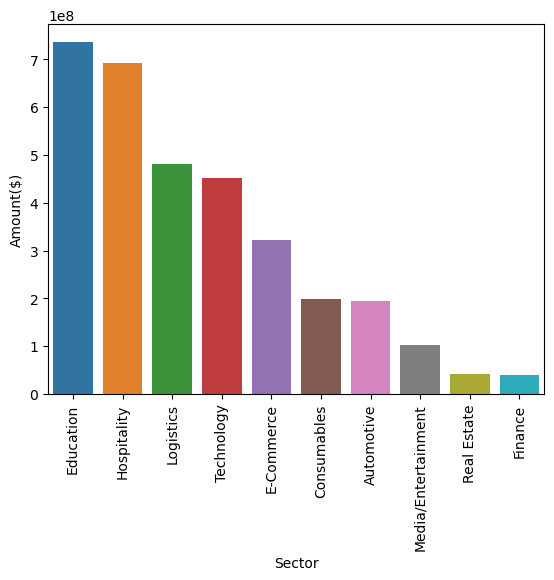

In [76]:
if ind_2019.empty:
    print("No data found for the year 2018")
else:
    # Calculate the total funding by sector
    total_funding_by_sector = ind_2019.groupby('Sector')['Amount($)'].sum().reset_index()

    top_10_sectors = total_funding_by_sector.sort_values(by='Amount($)', ascending=False).head(10)

    ax = sns.barplot(data=top_10_sectors, x='Sector', y='Amount($)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()


## Checking the shape of the data,Replace missing values and dropping,adding a date series

In [79]:
ind_2020.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,NaN
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed,NaN
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN,NaN
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN,NaN


In [80]:
ind_2020.describe()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
count,1055,843,961,1042,1055,1043,1017,1052,591,2
unique,905,27,77,302,990,927,848,309,42,2
top,Nykaa,2015,Bangalore,Fintech,Provides online learning classes,Falguni Nayar,Venture Catalysts,Undisclosed,Series A,Pre-Seed
freq,6,136,317,80,4,6,20,243,96,1


In [81]:
ind_2020['Sector'].replace('—', pd.np.nan, inplace=True)

ind_2020['Year']=2020

C:\Users\GILBERT\AppData\Local\Temp\ipykernel_12036\1812708846.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ind_2020['Sector'].replace('—', pd.np.nan, inplace=True)


In [82]:
ind_2020.isna().sum()

Company/Brand       0
Founded           212
HeadQuarter        94
Sector             13
What it does        0
Founders           12
Investor           38
Amount($)           3
Stage             464
Unnamed: 9       1053
Year                0
dtype: int64

In [83]:
ind_2020.loc[518, 'Sector'] = 'E-Commerce'
ind_2020.loc[569, 'Sector'] = 'E-Commerce'
ind_2020.loc[687, 'Sector'] = 'Social Work'
ind_2020.loc[699, 'Sector'] = 'Beauty&Wellness'
ind_2020.loc[707, 'Sector'] = 'E-Commerce'
ind_2020.loc[732, 'Sector'] = 'Technology'
ind_2020.loc[746, 'Sector'] = 'E-Commerce'
ind_2020.loc[763, 'Sector'] = 'E-Commerce'
ind_2020.loc[746, 'Sector'] = 'E-Commerce'
ind_2020.loc[809, 'Sector'] = 'Technology'
ind_2020.loc[918, 'Sector'] = 'Fintech'
ind_2020.loc[926, 'Sector'] = 'Real Estate'
ind_2020.loc[1012, 'Sector'] = 'Technology'
ind_2020.loc[1031, 'Sector'] = 'Technology'
ind_2020.loc[746, 'Sector'] = 'E-Commerce'

In [84]:
ind_2020.isna().sum()

Company/Brand       0
Founded           212
HeadQuarter        94
Sector              0
What it does        0
Founders           12
Investor           38
Amount($)           3
Stage             464
Unnamed: 9       1053
Year                0
dtype: int64

In [85]:
ind_2020.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1050    False
1051    False
1052    False
1053    False
1054    False
Length: 1055, dtype: bool

In [86]:
ind_2020.drop_duplicates(inplace=True)

In [87]:
# create a DatetimeIndex with dates for the entire year
date_range = pd.date_range(start='2020-01-01', end='2020-12-31', freq='D')

# create a new column 'Date' with random dates within the year 2018
ind_2020['Date'] = np.random.choice(date_range, size=len(ind_2020))

ind_2020 = ind_2020.sort_values('Date')

ind_2020['Date'] = pd.to_datetime(ind_2020['Date'], format='%Y-%m-%d')

In [88]:
ind_2020.set_index('Date',inplace=True)

## Updating the value in the revenue column, Using substrings to categorize values

In [90]:
ind_2020.iloc[166, ind_2020.columns.get_loc('HeadQuarter')] = 'Texas'
ind_2020.iloc[186, ind_2020.columns.get_loc('HeadQuarter')] = 'New York'
ind_2020.iloc[223, ind_2020.columns.get_loc('HeadQuarter')] = 'San Francisco'
ind_2020.iloc[225, ind_2020.columns.get_loc('HeadQuarter')] = 'San Francisco'
ind_2020.iloc[229, ind_2020.columns.get_loc('HeadQuarter')] = 'San Ramon'
ind_2020.iloc[230, ind_2020.columns.get_loc('HeadQuarter')] = 'Paris'
ind_2020.iloc[232, ind_2020.columns.get_loc('HeadQuarter')] = 'Texas'
ind_2020.iloc[240, ind_2020.columns.get_loc('HeadQuarter')] = 'San Francisco'
ind_2020.iloc[260, ind_2020.columns.get_loc('HeadQuarter')] = 'London'
ind_2020.iloc[261, ind_2020.columns.get_loc('HeadQuarter')] = 'Sydney'
ind_2020.iloc[262, ind_2020.columns.get_loc('HeadQuarter')] = 'Milano'
ind_2020.iloc[264, ind_2020.columns.get_loc('HeadQuarter')] = 'New York'
ind_2020.iloc[265, ind_2020.columns.get_loc('HeadQuarter')] = 'Queensland'
ind_2020.iloc[273, ind_2020.columns.get_loc('HeadQuarter')] = 'London'
ind_2020.iloc[279, ind_2020.columns.get_loc('HeadQuarter')] = 'San Francisco'
ind_2020.iloc[287, ind_2020.columns.get_loc('HeadQuarter')] = 'California'
ind_2020.iloc[292, ind_2020.columns.get_loc('HeadQuarter')] = 'San Francisco'
ind_2020.iloc[300, ind_2020.columns.get_loc('HeadQuarter')] = 'San Francisco'
ind_2020.iloc[301, ind_2020.columns.get_loc('HeadQuarter')] = 'Newcastle'
ind_2020.iloc[303, ind_2020.columns.get_loc('HeadQuarter')] = 'Shanghai'
ind_2020.iloc[306, ind_2020.columns.get_loc('HeadQuarter')] = 'Jiaxing'
ind_2020.iloc[384, ind_2020.columns.get_loc('HeadQuarter')] = 'Jawa Barat'
ind_2020.iloc[184, ind_2020.columns.get_loc('HeadQuarter')] = 'Haryana'
ind_2020.iloc[198, ind_2020.columns.get_loc('HeadQuarter')] = 'Rajastan'
ind_2020.iloc[191, ind_2020.columns.get_loc('HeadQuarter')] = 'Rajastan'
ind_2020.iloc[282, ind_2020.columns.get_loc('HeadQuarter')] = 'Kerala'
ind_2020.iloc[284, ind_2020.columns.get_loc('HeadQuarter')] = 'Biphar'


In [91]:
ind_2020.isna().sum()

Company/Brand       0
Founded           212
HeadQuarter        92
Sector              0
What it does        0
Founders           12
Investor           38
Amount($)           3
Stage             462
Unnamed: 9       1050
Year                0
dtype: int64

In [93]:
mode_value = ind_2020['Founders'].mode()[0]
print(mode_value)

mode_value = ind_2020['Stage'].mode()[0]
print(mode_value)

mode_value = ind_2020['Investor'].mode()[0]
print(mode_value)

mode_value = ind_2020['HeadQuarter'].mode()[0]
print(mode_value)

Byju Raveendran
Series A
Venture Catalysts
Bangalore


In [94]:
ind_2020['Founders'] = ind_2020['Founders'].fillna(ind_2020['Founders'].mode()[0])
ind_2020['Stage'] = ind_2020['Stage'].fillna(ind_2020['Stage'].mode()[0])
ind_2020['Investor'] = ind_2020['Investor'].fillna(ind_2020['Investor'].mode()[0])
ind_2020['HeadQuarter'] = ind_2020['HeadQuarter'].fillna(ind_2020['HeadQuarter'].mode()[0])

In [95]:
seedr = ['seed round','Seed round','Seed Round',]
preser= ['Pre Series A','Pre series A','Pre-series A','Pre-Series A']

ind_2020.loc[ind_2020['Stage'].str.contains('|'.join(seedr)), 'Stage'] = 'Seed Round'
ind_2020.loc[ind_2020['Stage'].str.contains('|'.join(preser)), 'Stage'] = 'Pre-series A'

In [96]:
ind_2020['Founded'] = pd.to_numeric(ind_2020['Founded'], errors='coerce')

ind_2020['Founded'] = ind_2020['Founded'].fillna(0)

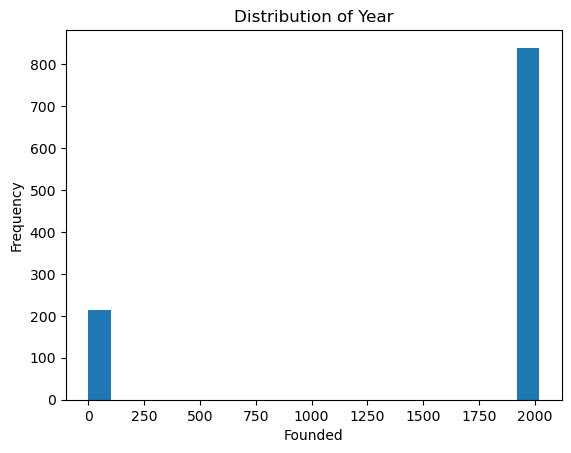

In [97]:
plt.hist(ind_2020['Founded'], bins=20)
plt.title('Distribution of Year')
plt.xlabel('Founded')
plt.ylabel('Frequency')
plt.show()

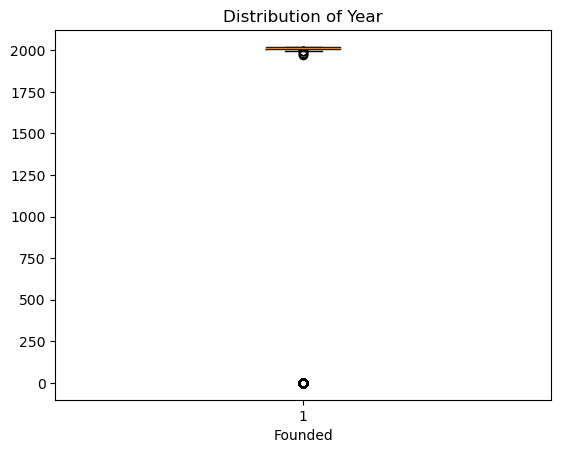

In [98]:
plt.boxplot(ind_2020['Founded'].dropna())
plt.title('Distribution of Year')
plt.xlabel('Founded')
plt.show()

In [99]:
ind_2020['Founded'].replace(0, np.nan, inplace=True)

In [100]:
ind_2020['Founded'].fillna(ind_2020['Founded'].median(), inplace=True)

ind_2020['Founded'] = ind_2020['Founded'].astype(int)

In [101]:
ind_2020.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9,Year
Date,,,,,,,,,,,
2020-01-01,GalaxyCard,2017,Gurugram,FinTech,Mobile based Instant credit card. | Easiest wa...,"Amit Kumar, Gunjeet Singh",India Accelerator,Undisclosed,Seed,NaN,2020
2020-01-01,iNurture,2009,Bangalore,Edtech,"It provides a conducive and healthy teaching, ...",Ashwin Ajila,BlackSoil Capital,"$1,340,000",Series A,NaN,2020
2020-01-01,Uniplatform Tech,2015,Delhi,SaaS,Runs real estate SaaS platform MultiplyMyLeads...,"Rohit Manghnani, Amit K Jaiswal, Iccha Manghnani","Frontline Strategy Finds, SucSEED Venture Part...",Undisclosed,Series A,NaN,2020
2020-01-01,Flickstree,2014,Mumbai,Tech,World's largest video publisher,"Saurabh Singh, Rahul Jain, Nagender Sangra","MOX, Venture Catalysts","$40,900",Series A,NaN,2020
2020-01-01,Brinton,2014,California,HealthTech,Brinton is one of the fastest growing Pharmace...,Rahul Darda,"India Alternatives Private Equity Fund, Tata C...","$1,300,000",Debt,NaN,2020


In [102]:
ind_2020.drop('What it does',axis=1,inplace=True)

In [103]:
ind_2020.drop('Unnamed: 9',axis=1,inplace=True)

In [104]:
ind_2020.isna().sum()

Company/Brand    0
Founded          0
HeadQuarter      0
Sector           0
Founders         0
Investor         0
Amount($)        3
Stage            0
Year             0
dtype: int64

In [105]:
ind_2020.head()

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Year
Date,,,,,,,,,
2020-01-01,GalaxyCard,2017,Gurugram,FinTech,"Amit Kumar, Gunjeet Singh",India Accelerator,Undisclosed,Seed,2020
2020-01-01,iNurture,2009,Bangalore,Edtech,Ashwin Ajila,BlackSoil Capital,"$1,340,000",Series A,2020
2020-01-01,Uniplatform Tech,2015,Delhi,SaaS,"Rohit Manghnani, Amit K Jaiswal, Iccha Manghnani","Frontline Strategy Finds, SucSEED Venture Part...",Undisclosed,Series A,2020
2020-01-01,Flickstree,2014,Mumbai,Tech,"Saurabh Singh, Rahul Jain, Nagender Sangra","MOX, Venture Catalysts","$40,900",Series A,2020
2020-01-01,Brinton,2014,California,HealthTech,Rahul Darda,"India Alternatives Private Equity Fund, Tata C...","$1,300,000",Debt,2020


## Converting the structure of the amt col,filling missing val with stats data,creating a substring to structure the sector column

In [106]:
ind_2020['Amount($)'].replace('', pd.np.nan, inplace=True)
ind_2020['Amount($)'] = ind_2020['Amount($)'].replace('undisclosed', np.nan)

C:\Users\GILBERT\AppData\Local\Temp\ipykernel_12036\4231441892.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ind_2020['Amount($)'].replace('', pd.np.nan, inplace=True)


In [107]:
# if it is not already a string, convert it to string
if ind_2020['Amount($)'].dtype != 'object':
    ind_2020['Amount($)'] = ind_2020['Amount($)'].astype(str)

# # remove non-numeric characters from the 'Amount' column
ind_2020['Amount($)'] = ind_2020['Amount($)'].str.replace('[^\d\.]', '')

ind_2020['Amount($)'] = pd.to_numeric(ind_2020['Amount($)'])

C:\Users\GILBERT\AppData\Local\Temp\ipykernel_12036\2403162787.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  ind_2020['Amount($)'] = ind_2020['Amount($)'].str.replace('[^\d\.]', '')


In [108]:
ind_2020.head()

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Year
Date,,,,,,,,,
2020-01-01,GalaxyCard,2017,Gurugram,FinTech,"Amit Kumar, Gunjeet Singh",India Accelerator,NaN,Seed,2020
2020-01-01,iNurture,2009,Bangalore,Edtech,Ashwin Ajila,BlackSoil Capital,1340000.0,Series A,2020
2020-01-01,Uniplatform Tech,2015,Delhi,SaaS,"Rohit Manghnani, Amit K Jaiswal, Iccha Manghnani","Frontline Strategy Finds, SucSEED Venture Part...",NaN,Series A,2020
2020-01-01,Flickstree,2014,Mumbai,Tech,"Saurabh Singh, Rahul Jain, Nagender Sangra","MOX, Venture Catalysts",40900.0,Series A,2020
2020-01-01,Brinton,2014,California,HealthTech,Rahul Darda,"India Alternatives Private Equity Fund, Tata C...",1300000.0,Debt,2020


In [109]:
ind_2020['Amount($)'] = ind_2020['Amount($)'].fillna(0)

In [110]:
ind_2020.isna().sum()

Company/Brand    0
Founded          0
HeadQuarter      0
Sector           0
Founders         0
Investor         0
Amount($)        0
Stage            0
Year             0
dtype: int64

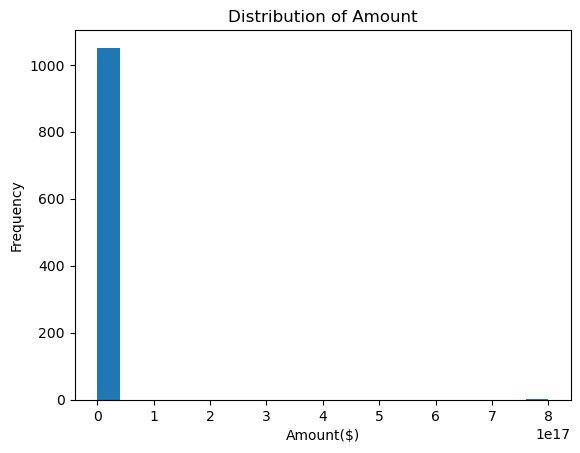

In [112]:
plt.hist(ind_2020['Amount($)'], bins=20)
plt.title('Distribution of Amount')
plt.xlabel('Amount($)')
plt.ylabel('Frequency')
plt.show()

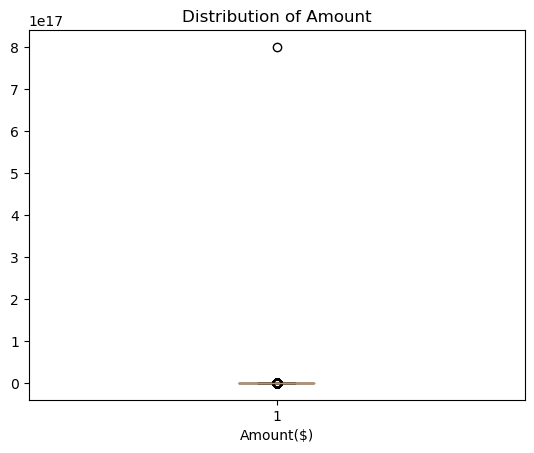

In [113]:
plt.boxplot(ind_2020['Amount($)'])
plt.title('Distribution of Amount')
plt.xlabel('Amount($)')
plt.show()

In [114]:
ind_2020['Amount($)'].replace(0, np.nan, inplace=True)

In [115]:
ind_2020.isna().sum()

Company/Brand      0
Founded            0
HeadQuarter        0
Sector             0
Founders           0
Investor           0
Amount($)        247
Stage              0
Year               0
dtype: int64

In [116]:
ind_2020['Amount($)'].fillna(ind_2020['Amount($)'].median(), inplace=True)

ind_2020['Amount($)'] = ind_2020['Amount($)'].astype(int)

In [118]:
ind_2020.head()

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Year
Date,,,,,,,,,
2020-01-01,GalaxyCard,2017,Gurugram,FinTech,"Amit Kumar, Gunjeet Singh",India Accelerator,3000000,Seed,2020
2020-01-01,iNurture,2009,Bangalore,Edtech,Ashwin Ajila,BlackSoil Capital,1340000,Series A,2020
2020-01-01,Uniplatform Tech,2015,Delhi,SaaS,"Rohit Manghnani, Amit K Jaiswal, Iccha Manghnani","Frontline Strategy Finds, SucSEED Venture Part...",3000000,Series A,2020
2020-01-01,Flickstree,2014,Mumbai,Tech,"Saurabh Singh, Rahul Jain, Nagender Sangra","MOX, Venture Catalysts",40900,Series A,2020
2020-01-01,Brinton,2014,California,HealthTech,Rahul Darda,"India Alternatives Private Equity Fund, Tata C...",1300000,Debt,2020


In [119]:
# # Create a list of substrings to search for in the Sector column
tech = ['Mobile','Technology', 'Internet', 'Software', 'Hardware','SaaS','Blockchain','Apps','Information Services','SEM',
        'Artificial Intelligence','CleanTech','Aerospace','Robotics','Ai','PaaS','Medtech','Agritech','HR tech',
       'Tech','FoodTech','Safety tech','IoT','Legal tech','Infratech','Netwokring platform','Telecommunication','Cloud','Aero',
       'Virtual','Content','Photonics','app','Proptech','Deeptech','AR','VR','Agri tech','-Tech','AgriTech','IT','Network',
        'Data','HrTech','Foodtech','Spacetech','E-mobility','Automation','Logitech','HRTech','Drone','MLOps','Innovation',
       'BioTechnology','TaaS','network','equipment','SpaceTech','CRM','MarTech','Nanotechnology','Femtech','startup','AI']
fin = ['Lending','Finance','Insurance', 'Payments','Financial Services','Credit','Credit Cards','Mutual Funds',
       'Banking','Escrow','Venture','financial','Taxation','Capital','firm','Equity']
fint = ['NFT','Virtual Banking','FinTech','Fintech','Cryptocurrency','Crypto','Insurtech','InsurTech']
health = ['Health', 'Medical','Pharmaceutical','Health Diagnotics','Health Care','Hospital','Biotechnology','Biopharma',
         'Hygiene management','HealthTech','Healthcare','HealthCare','laboratory','Biotech','Healthtech','HeathTech',
         'Helathcare','Veterinary']
mkt = ['Brand Marketing','Marketing','Event Promotion','Market']
agric = ['Farming','Agriculture','Nutrition','Hauz Khas','Fishery']
con = ['Food','Food and Beverages','Dairy','Beverages','Beer','FMCG','Beverage']
econ = ['B2B','Shopping','E-Commerce','Trading Platform','E-commerce','E-marketplace','marketplace','e-commerce','Ecommerce',
        'E-market','Commerce','Trading platform']
cons = ['Wholesale','Consumer','Shoes','Packaging','Retail','Consulting','Food Delivery']
edu = ['E-Learning','EdTech','Education','Communities','Edtech','Preschool','School']
welln = ['Lifestyle','Beauty','Wellness','Cosmetics','Yoga','Skincare','D2C','Fitness','Lifestyle','Training']
real_est=['Real Estate','Home Decor','Accomodation','Interior design','Home Design','Home interior','Co-living',
          'Construction']
log = ['Logistics','Rental','Tourism','Travel','TravelTech','Transport','Transportation','Aviation','Mobility']

auto = ['Automotive','Electric vehicle','Industrial Automation','Vehicles','Automotive tech','Automobile','Tyre','car','Car',
       'Vehicle','Mechanical']
manu = ['Manufacturing']
ener = ['Renewable Energy','Solar','Energy','Energy Storage','Battery','Oil and Gas','Renewable','EV','Electricity',
       'purification','Renewables']
medi = ['Entertainment','Media','News','Video','Digital Media','FM','Publication','OTT','Social Network','Music',
        'Digital platform','Podcast','publishing','Blogging']
game = ['Gaming','Games','Sports']

style = ['Fashion','Jewelry','Eyeglasses','Eye Wear','Apparel','Dating','Celebrity','Eyewear','D2C Fashion','Matrimony',
         'Textiles','D2C jewellery','Foootwear','Arts']
hos =['Hospitality','Hotel','Leisure']


ind_2020['Sector_clean'] = 'Other'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(tech)), 'Sector_clean'] = 'Technology'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(fin)), 'Sector_clean'] = 'Finance'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(health)), 'Sector_clean'] = 'Healthcare'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(mkt)), 'Sector_clean'] = 'Marketing'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(agric)), 'Sector_clean'] = 'Agriculture'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(econ)), 'Sector_clean'] = 'E-Commerce'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(edu)), 'Sector_clean'] = 'Education'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(welln)), 'Sector_clean'] = 'Wellness/Beauty'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(real_est)), 'Sector_clean'] = 'Real Estate'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(log)), 'Sector_clean'] = 'Logistics'

ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(auto)), 'Sector_clean'] = 'Automotive'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(manu)), 'Sector_clean'] = 'Manufacture'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(ener)), 'Sector_clean'] = 'Energy'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(medi)), 'Sector_clean'] = 'Media/Entertainment'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(hos)), 'Sector_clean'] = 'Hospitality'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(style)), 'Sector_clean'] = 'Lifestyle'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(cons)), 'Sector_clean'] = 'Consumer Services'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(game)), 'Sector_clean'] = 'Gaming'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(fint)), 'Sector_clean'] = 'FinTech'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(con)), 'Sector_clean'] = 'Consumables'

In [120]:
ind_2020.head()

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Year,Sector_clean
Date,,,,,,,,,,
2020-01-01,GalaxyCard,2017,Gurugram,FinTech,"Amit Kumar, Gunjeet Singh",India Accelerator,3000000,Seed,2020,FinTech
2020-01-01,iNurture,2009,Bangalore,Edtech,Ashwin Ajila,BlackSoil Capital,1340000,Series A,2020,Education
2020-01-01,Uniplatform Tech,2015,Delhi,SaaS,"Rohit Manghnani, Amit K Jaiswal, Iccha Manghnani","Frontline Strategy Finds, SucSEED Venture Part...",3000000,Series A,2020,Technology
2020-01-01,Flickstree,2014,Mumbai,Tech,"Saurabh Singh, Rahul Jain, Nagender Sangra","MOX, Venture Catalysts",40900,Series A,2020,Technology
2020-01-01,Brinton,2014,California,HealthTech,Rahul Darda,"India Alternatives Private Equity Fund, Tata C...",1300000,Debt,2020,Healthcare


In [121]:
ind_2020.drop('Sector',axis=1,inplace=True)

In [122]:
ind_2020= ind_2020.rename(columns={'Sector_clean': 'Sector'})

In [123]:
ind_2020.isna().sum()

Company/Brand    0
Founded          0
HeadQuarter      0
Founders         0
Investor         0
Amount($)        0
Stage            0
Year             0
Sector           0
dtype: int64

In [125]:
ind_2021.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


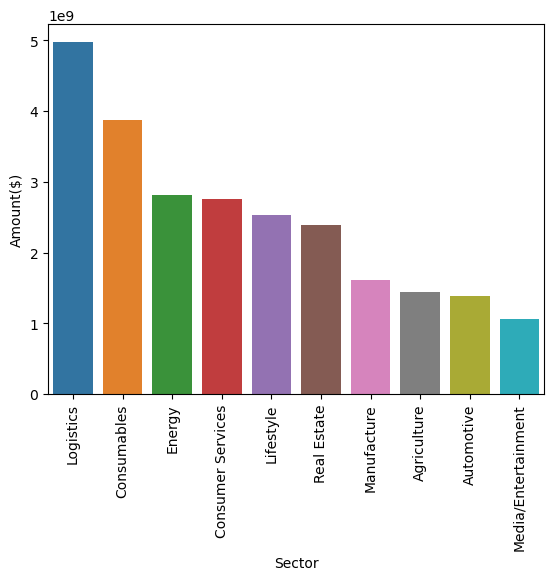

In [126]:
if ind_2020.empty:
    print("No data found for the year 2018")
else:
    # Calculate the total funding by sector
    total_funding_by_sector = ind_2018.groupby('Sector')['Amount($)'].sum().reset_index()

    top_10_sectors = total_funding_by_sector.sort_values(by='Amount($)', ascending=False).head(10)

    ax = sns.barplot(data=top_10_sectors, x='Sector', y='Amount($)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()


## checking the data shape / filling missing values/ creating a date series

In [127]:
ind_2021.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [128]:
ind_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What it does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount($)      1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [129]:
ind_2021.describe()

,Founded
count,1208.000000
mean,2016.655629
std,4.517364
min,1963.000000
25%,2015.000000
50%,2018.000000
75%,2020.000000
max,2021.000000


In [130]:
ind_2021.isna().sum()

Company/Brand      0
Founded            1
HeadQuarter        1
Sector             0
What it does       0
Founders           4
Investor          62
Amount($)          3
Stage            428
dtype: int64

In [131]:
# replace empty values with NaN
ind_2021['Sector'].replace('—', pd.np.nan, inplace=True)

ind_2021['Year']=2021

C:\Users\GILBERT\AppData\Local\Temp\ipykernel_12036\2320037695.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ind_2021['Sector'].replace('—', pd.np.nan, inplace=True)


In [132]:
ind_2021.isna().sum()

Company/Brand      0
Founded            1
HeadQuarter        1
Sector             0
What it does       0
Founders           4
Investor          62
Amount($)          3
Stage            428
Year               0
dtype: int64

In [133]:
# create a DatetimeIndex with dates for the entire year
date_range = pd.date_range(start='2021-01-01', end='2021-12-31', freq='D')

# create a new column 'Date' with random dates within the year 2018
ind_2021['Date'] = np.random.choice(date_range, size=len(ind_2021))

ind_2021 = ind_2021.sort_values('Date')

ind_2021['Date'] = pd.to_datetime(ind_2021['Date'], format='%Y-%m-%d')


In [134]:
ind_2021.set_index('Date',inplace=True)

## Moving values to another column using integer loc, Extracting and updating values in the column using functions

In [135]:
ind_2021.iloc[242, ind_2021.columns.get_loc('Stage')] = ind_2021.iloc[242, ind_2021.columns.get_loc('Amount($)')]
ind_2021.iloc[242, ind_2021.columns.get_loc('Amount($)')] = np.nan

ind_2021.iloc[242, ind_2021.columns.get_loc('Amount($)')] = ind_2021.iloc[242, ind_2021.columns.get_loc('Investor')]
ind_2021.iloc[242, ind_2021.columns.get_loc('Investor')] = np.nan

In [136]:
# check if $ symbol exists in Stage column
if '$' in ind_2021['Stage'].values:
    # loop through each row of the dataframe
    for index, row in ind_2021.iterrows():
        # check if $ symbol exists in the Stage column for this row
        if '$' in row['Stage']:
            # find the index of the $ symbol in the Stage column
            dollar_index = row['Stage'].index('$')
            # get the amount value from the Stage column
            amount = row['Stage'][dollar_index+1:].strip()
            # update the Amount($) column with the amount value
            ind_2020.at[index, 'Amount($)'] = amount
            # update the Stage column without the $ symbol
            ind_2020.at[index, 'Stage'] = ''

In [137]:
ind_2021['HeadQuarter'].ffill(inplace=True)

ind_2021['Stage'] = ind_2021['Stage'].fillna(ind_2021['Stage'].mode()[0])

In [138]:
mode_value = ind_2021['Investor'].mode()[0]
print(mode_value)

Inflection Point Ventures


In [139]:
ind_2021['Investor'] = ind_2021['Investor'].fillna(ind_2021['Investor'].mode()[0])

In [140]:
mode_value = ind_2021['Founders'].mode()[0]
print(mode_value)

Ashneer Grover, Shashvat Nakrani


In [141]:
ind_2021['Founders'] = ind_2021['Founders'].fillna(ind_2021['Founders'].mode()[0])

In [142]:
ind_2021.drop('What it does', axis=1,inplace=True)

## Replacing the missing values in the founded column by using Statiscal means

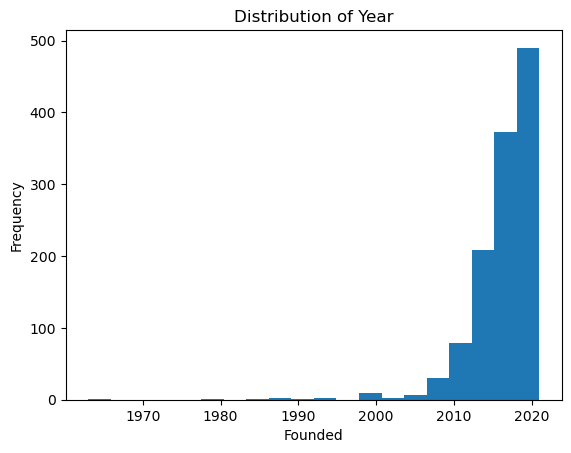

In [143]:
plt.hist(ind_2021['Founded'], bins=20)
plt.title('Distribution of Year')
plt.xlabel('Founded')
plt.ylabel('Frequency')
plt.show()

In [144]:
ind_2021['Founded'] = pd.to_numeric(ind_2021['Founded'], errors='coerce')

In [145]:
ind_2021['Founded'] = ind_2021['Founded'].fillna(ind_2021['Founded'].median())

In [146]:
ind_2021.head(50)

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Year
Date,,,,,,,,,
2021-01-01,Toplyne,2021.0,Bangalore,Computer Software,"Rishen Kapoor and Ruchin Kulkarni, Rohit Khanna","Sequoia Capital , Together Fund",$2500000,Seed,2021
2021-01-01,kWh Bikes,2020.0,Bangalore,Automotive,"Siddharth Janghu, Kartik Gupta, Anupriya","Let’s Venture, Better Capital",$2000000,Seed,2021
2021-01-01,Pocket Aces,2013.0,Mumbai,Media,"Anirudh Pandita, Aditi Shrivastava, Ashwin Suresh","3one4 Capital, DSP Group","$2,000,000",Seed,2021
2021-01-01,FanPlay,2020.0,Computer Games,Computer Games,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000,2021
2021-01-01,Cellestial,2019.0,Hyderabad,Electronics,Siddhartha Durairajan,"Gurj Aujla, Ashik K","$500,000",Pre-series A,2021
2021-01-02,Ruptok,2020.0,New Delhi,FinTech,"Ankur Gupta, Akshita Gupta, Yashwardhan Aeren",Wurk,"$10,000,000",Seed,2021
2021-01-02,BYJU'S,2011.0,Bangalore,EdTech,"Byju Raveendran, Divya Gokulnath","Oxshott Capital Partners, XN Exponent, Edelweiss",$300000000,Seed,2021
2021-01-02,Avataar Ventures,2019.0,Bangalore,FinTech,Mohan Kumar,Inflection Point Ventures,"$100,000,000",Seed,2021
2021-01-02,Cuvette Tech,2020.0,Bangalore,Human Resources,"Atul Singhal, Sudhanshu Singh","Varun Alagh, Harish Daiya","$1,800,000",Seed,2021


## Filtering & replacing missing values in the the amount col, containing the sector col into categories by putting them in substrings

In [147]:
ind_2021.isna().sum()

Company/Brand    0
Founded          0
HeadQuarter      0
Sector           0
Founders         0
Investor         0
Amount($)        3
Stage            0
Year             0
dtype: int64

In [148]:
# replace empty values with NaN
ind_2021['Amount($)'].replace('', pd.np.nan, inplace=True)

C:\Users\GILBERT\AppData\Local\Temp\ipykernel_12036\3156858020.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ind_2021['Amount($)'].replace('', pd.np.nan, inplace=True)


In [149]:
ind_2021['Amount($)'] = ind_2021['Amount($)'].replace('undisclosed', np.nan)

In [150]:
# if it is not already a string, convert it to string
if ind_2021['Amount($)'].dtype != 'object':
    ind_2021['Amount($)'] = ind_2021['Amount($)'].astype(str)

# # remove non-numeric characters from the 'Amount' column
ind_2021['Amount($)'] = ind_2021['Amount($)'].str.replace('[^\d\.]', '')

ind_2021['Amount($)'] = pd.to_numeric(ind_2021['Amount($)'])

C:\Users\GILBERT\AppData\Local\Temp\ipykernel_12036\803264993.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  ind_2021['Amount($)'] = ind_2021['Amount($)'].str.replace('[^\d\.]', '')


In [151]:
# Replace NaN values with 0
ind_2021['Amount($)'] = ind_2021['Amount($)'].fillna(0)

In [152]:
ind_2021.isna().sum()

Company/Brand    0
Founded          0
HeadQuarter      0
Sector           0
Founders         0
Investor         0
Amount($)        0
Stage            0
Year             0
dtype: int64

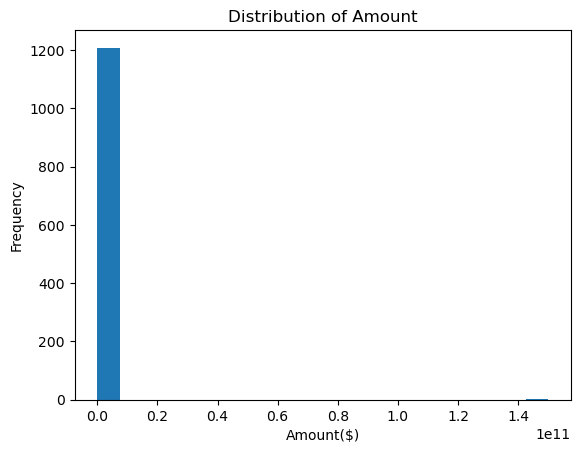

In [153]:
plt.hist(ind_2021['Amount($)'], bins=20)
plt.title('Distribution of Amount')
plt.xlabel('Amount($)')
plt.ylabel('Frequency')
plt.show()

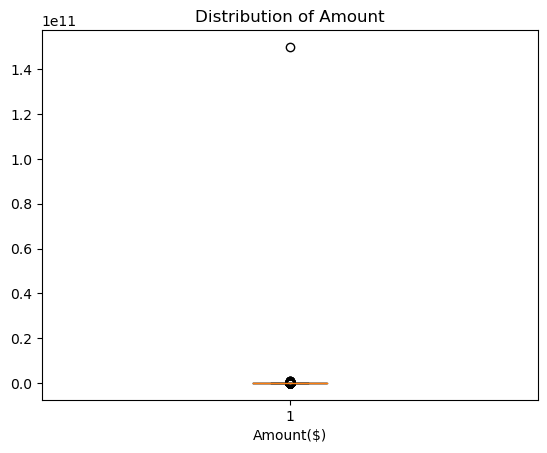

In [154]:
plt.boxplot(ind_2021['Amount($)'])
plt.title('Distribution of Amount')
plt.xlabel('Amount($)')
plt.show()

In [155]:
ind_2021['Amount($)'].replace(0, np.nan, inplace=True)

In [156]:
# Fill missing values with median value
ind_2021['Amount($)'].fillna(ind_2021['Amount($)'].mean(), inplace=True)

ind_2021['Amount($)'] = ind_2021['Amount($)'].astype(int)

In [157]:
ind_2021.isna().sum()

Company/Brand    0
Founded          0
HeadQuarter      0
Sector           0
Founders         0
Investor         0
Amount($)        0
Stage            0
Year             0
dtype: int64

In [159]:
ind_2021.head()

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Year
Date,,,,,,,,,
2021-01-01,Toplyne,2021.0,Bangalore,Computer Software,"Rishen Kapoor and Ruchin Kulkarni, Rohit Khanna","Sequoia Capital , Together Fund",2500000,Seed,2021
2021-01-01,kWh Bikes,2020.0,Bangalore,Automotive,"Siddharth Janghu, Kartik Gupta, Anupriya","Let’s Venture, Better Capital",2000000,Seed,2021
2021-01-01,Pocket Aces,2013.0,Mumbai,Media,"Anirudh Pandita, Aditi Shrivastava, Ashwin Suresh","3one4 Capital, DSP Group",2000000,Seed,2021
2021-01-01,FanPlay,2020.0,Computer Games,Computer Games,YC W21,"Pritesh Kumar, Bharat Gupta",170438589,$1200000,2021
2021-01-01,Cellestial,2019.0,Hyderabad,Electronics,Siddhartha Durairajan,"Gurj Aujla, Ashik K",500000,Pre-series A,2021


In [160]:
# # Create a list of substrings to search for in the Sector column
tech = ['Mobile','Technology', 'Internet', 'Software', 'Hardware','SaaS','Blockchain','Apps','Information Services','SEM',
        'Artificial Intelligence','CleanTech','Aerospace','Robotics','Ai','PaaS','Medtech','Agritech','HR tech',
       'Tech','FoodTech','Safety tech','IoT','Legal tech','Infratech','Netwokring platform','Telecommunication','Cloud','Aero',
       'Virtual','Content','Photonics','app','Proptech','Deeptech','AR','VR','Agri tech','-Tech','AgriTech','IT','Network',
        'Data','HrTech','Foodtech','Spacetech','E-mobility','Automation','Logitech','HRTech','Drone','MLOps','Innovation',
       'BioTechnology','TaaS','network','equipment','SpaceTech','CRM','MarTech','Nanotechnology','Femtech','startup','AI']
fin = ['Lending','Finance','Insurance', 'Payments','Financial Services','Credit','Credit Cards','Mutual Funds',
       'Banking','Escrow','Venture','financial','Taxation','Capital','firm','Equity']
fint = ['NFT','Virtual Banking','FinTech','Fintech','Cryptocurrency','Crypto','Insurtech','InsurTech']
health = ['Health', 'Medical','Pharmaceutical','Health Diagnotics','Health Care','Hospital','Biotechnology','Biopharma',
         'Hygiene management','HealthTech','Healthcare','HealthCare','laboratory','Biotech','Healthtech','HeathTech',
         'Helathcare','Veterinary']
mkt = ['Brand Marketing','Marketing','Event Promotion','Market']
agric = ['Farming','Agriculture','Nutrition','Hauz Khas','Fishery']
con = ['Food','Food and Beverages','Dairy','Beverages','Beer','FMCG']
econ = ['B2B','Shopping','E-Commerce','Trading Platform','E-commerce','E-marketplace','marketplace','e-commerce','Ecommerce',
        'E-market','Commerce','Trading platform']
cons = ['Wholesale','Consumer','Shoes','Packaging','Retail','Consulting','Food Delivery']
edu = ['E-Learning','EdTech','Education','Communities','Edtech','Preschool','School']
welln = ['Lifestyle','Beauty','Wellness','Cosmetics','Yoga','Skincare','D2C','Fitness','Lifestyle','Training']
real_est=['Real Estate','Home Decor','Accomodation','Interior design','Home Design','Home interior','Co-living',
          'Construction']
log = ['Logistics','Rental','Tourism','Travel','TravelTech','Transport','Transportation','Aviation','Mobility']

auto = ['Automotive','Electric vehicle','Industrial Automation','Vehicles','Automotive tech','Automobile','Tyre','car','Car',
       'Vehicle','Mechanical']
manu = ['Manufacturing']
ener = ['Renewable Energy','Solar','Energy','Energy Storage','Battery','Oil and Gas','Renewable','EV','Electricity',
       'purification','Renewables']
medi = ['Entertainment','Media','News','Video','Digital Media','FM','Publication','OTT','Social Network','Music',
        'Digital platform','Podcast','publishing','Blogging']
Game = ['Gaming','Games','Sports']

style = ['Fashion','Jewelry','Eyeglasses','Eye Wear','Apparel','Dating','Celebrity','Eyewear','D2C Fashion','Matrimony',
         'Textiles','D2C jewellery','Foootwear','Arts']
hos =['Hospitality','Hotel','Leisure']


ind_2021['Sector_clean'] = 'Other'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(tech)), 'Sector_clean'] = 'Technology'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(fin)), 'Sector_clean'] = 'Finance'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(health)), 'Sector_clean'] = 'Healthcare'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(mkt)), 'Sector_clean'] = 'Marketing'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(agric)), 'Sector_clean'] = 'Agriculture'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(econ)), 'Sector_clean'] = 'E-Commerce'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(edu)), 'Sector_clean'] = 'Education'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(welln)), 'Sector_clean'] = 'Wellness/Beauty'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(real_est)), 'Sector_clean'] = 'Real Estate'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(log)), 'Sector_clean'] = 'Logistics'

ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(auto)), 'Sector_clean'] = 'Automotive'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(manu)), 'Sector_clean'] = 'Manufacture'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(ener)), 'Sector_clean'] = 'Energy'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(medi)), 'Sector_clean'] = 'Media/Entertainment'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(hos)), 'Sector_clean'] = 'Hospitality'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(style)), 'Sector_clean'] = 'Lifestyle'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(cons)), 'Sector_clean'] = 'Consumer Services'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(game)), 'Sector_clean'] = 'Gaming'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(fint)), 'Sector_clean'] = 'FinTech'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(con)), 'Sector_clean'] = 'Consumables'

In [161]:
# replace the value in row  of Column1 with NaN & fill/replace with mode

ind_2021['HeadQuarter'] = ind_2021['HeadQuarter'].replace('Food & Beverages', np.nan)
ind_2021['HeadQuarter'] = ind_2021['HeadQuarter'].replace('Pharmaceuticals\t#REF!', np.nan)
ind_2021['HeadQuarter'] = ind_2021['HeadQuarter'].replace('Online Media#REF!', np.nan)

ind_2021['HeadQuarter'] = ind_2021['HeadQuarter'].replace('Gurugram\t#REF!', 'Gurugram')
ind_2021['HeadQuarter'] = ind_2021['HeadQuarter'].replace('Information Technology & Services', 'Manchester')
ind_2021['HeadQuarter'] = ind_2021['HeadQuarter'].replace('Mountain View, CA', 'California')
ind_2021['HeadQuarter'] = ind_2021['HeadQuarter'].replace('Faridabad, Haryana', 'Haryana')
ind_2021['HeadQuarter'] = ind_2021['HeadQuarter'].replace('Small Towns, Andhra Pradesh', 'Andhra Pradesh')


ind_2021['HeadQuarter'] = ind_2021['HeadQuarter'].fillna(ind_2021['HeadQuarter'].mode()[0])


In [162]:
# filling the gaps with appropriate naming convention

ind_2021['Sector'] = ind_2021['Sector'].replace('Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients.', 'Healthcare')
ind_2021['Sector'] = ind_2021['Sector'].replace('Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients.', 'Healthcare')   
ind_2021['Sector'] = ind_2021['Sector'].replace('MoEVing is Indias only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India.', 'Energy')
ind_2021['Sector'] = ind_2021['Sector'].replace('Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience.', 'Media/Entertainment')

In [163]:
ind_2021.head()

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Year,Sector_clean
Date,,,,,,,,,,
2021-01-01,Toplyne,2021.0,Bangalore,Computer Software,"Rishen Kapoor and Ruchin Kulkarni, Rohit Khanna","Sequoia Capital , Together Fund",2500000,Seed,2021,Technology
2021-01-01,kWh Bikes,2020.0,Bangalore,Automotive,"Siddharth Janghu, Kartik Gupta, Anupriya","Let’s Venture, Better Capital",2000000,Seed,2021,Automotive
2021-01-01,Pocket Aces,2013.0,Mumbai,Media,"Anirudh Pandita, Aditi Shrivastava, Ashwin Suresh","3one4 Capital, DSP Group",2000000,Seed,2021,Media/Entertainment
2021-01-01,FanPlay,2020.0,Computer Games,Computer Games,YC W21,"Pritesh Kumar, Bharat Gupta",170438589,$1200000,2021,Gaming
2021-01-01,Cellestial,2019.0,Hyderabad,Electronics,Siddhartha Durairajan,"Gurj Aujla, Ashik K",500000,Pre-series A,2021,Other


In [164]:
ind_2021.isna().sum()

Company/Brand    0
Founded          0
HeadQuarter      0
Sector           0
Founders         0
Investor         0
Amount($)        0
Stage            0
Year             0
Sector_clean     0
dtype: int64

In [165]:
ind_2021.drop(ind_2021.columns[-7], axis=1,inplace=True)

In [166]:
ind_2021= ind_2021.rename(columns={'Sector_clean': 'Sector'})

In [167]:
ind_2021['Founded'] = ind_2021['Founded'].astype(int)

In [168]:
ind_2021.head()

,Company/Brand,Founded,HeadQuarter,Founders,Investor,Amount($),Stage,Year,Sector
Date,,,,,,,,,
2021-01-01,Toplyne,2021,Bangalore,"Rishen Kapoor and Ruchin Kulkarni, Rohit Khanna","Sequoia Capital , Together Fund",2500000,Seed,2021,Technology
2021-01-01,kWh Bikes,2020,Bangalore,"Siddharth Janghu, Kartik Gupta, Anupriya","Let’s Venture, Better Capital",2000000,Seed,2021,Automotive
2021-01-01,Pocket Aces,2013,Mumbai,"Anirudh Pandita, Aditi Shrivastava, Ashwin Suresh","3one4 Capital, DSP Group",2000000,Seed,2021,Media/Entertainment
2021-01-01,FanPlay,2020,Computer Games,YC W21,"Pritesh Kumar, Bharat Gupta",170438589,$1200000,2021,Gaming
2021-01-01,Cellestial,2019,Hyderabad,Siddhartha Durairajan,"Gurj Aujla, Ashik K",500000,Pre-series A,2021,Other


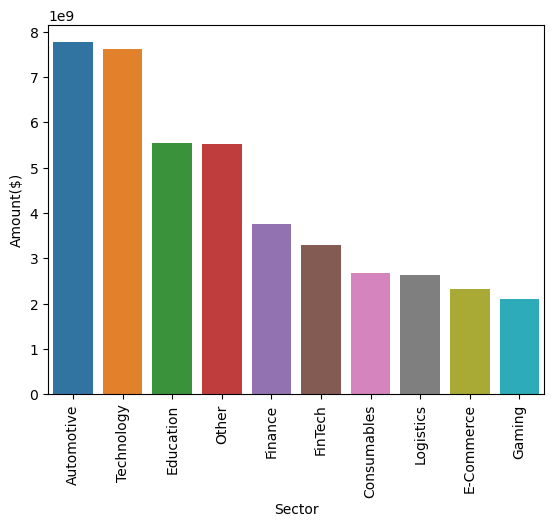

In [169]:
if ind_2021.empty:
    print("No data found for the year 2018")
else:
    # Calculate the total funding by sector
    total_funding_by_sector = ind_2021.groupby('Sector')['Amount($)'].sum().reset_index()

    top_10_sectors = total_funding_by_sector.sort_values(by='Amount($)', ascending=False).head(10)

    ax = sns.barplot(data=top_10_sectors, x='Sector', y='Amount($)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()


## filling missing values in 2018 with merged data, checking the correlation,converting amount col to float

In [170]:
# Compute the correlation matrix
combined_ind = pd.concat([ind_2019, ind_2020, ind_2021], axis=0)

correlation_matrix = combined_ind.corr()

print(correlation_matrix)

            Founded  Amount($)      Year
Founded    1.000000   0.040641  0.151314
Amount($)  0.040641   1.000000  0.115854
Year       0.151314   0.115854  1.000000


In [171]:
ind_2018.isna().sum()

Company/Brand      0
Stage              0
Amount($)          0
Year               0
Founded          526
HeadQuarter        0
Sector             0
dtype: int64

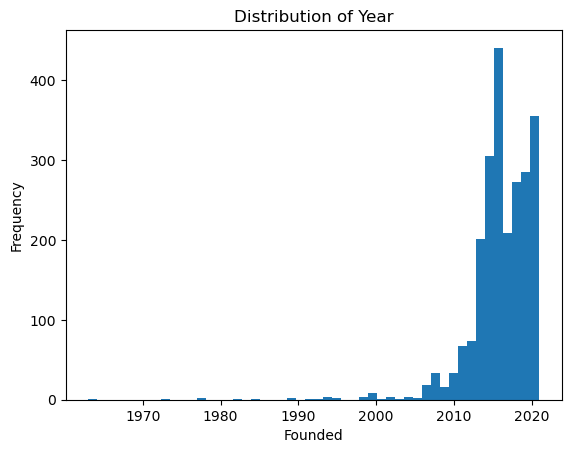

In [172]:
plt.hist(combined_ind['Founded'], bins=50)
plt.title('Distribution of Year')
plt.xlabel('Founded')
plt.ylabel('Frequency')
plt.show()

In [173]:
# Calculate the median of the column
median_value = combined_ind['Founded'].median()

In [174]:
ind_2018['Founded'].fillna(median_value, inplace=True)

In [175]:
ind_2018.isna().sum()

Company/Brand    0
Stage            0
Amount($)        0
Year             0
Founded          0
HeadQuarter      0
Sector           0
dtype: int64

In [176]:
ind_2018['Founded'] = ind_2018['Founded'].astype(int)

In [177]:
ind_2018.head()

,Company/Brand,Stage,Amount($),Year,Founded,HeadQuarter,Sector
Date,,,,,,,
2018-01-03,Flathalt,Angel,50000,2018,2016,Gurgaon,Real Estate
2018-01-03,Mihuru,Seed,150000,2018,2016,Mumbai,Logistics
2018-01-03,Pooltoo,Seed,5800000,2018,2016,New Delhi,Logistics
2018-01-04,Taru Naturals,Seed,5800000,2018,2016,Mumbai,Agriculture
2018-01-06,Trell,Seed,1250000,2018,2016,Bangalore City,Technology


In [178]:
ind_2018["Amount($)"] = ind_2018["Amount($)"].astype(float)

ind_2019["Amount($)"] = ind_2019["Amount($)"].astype(float)

ind_2020["Amount($)"] = ind_2020["Amount($)"].astype(float)

ind_2021["Amount($)"] = ind_2021["Amount($)"].astype(float)

In [180]:
ind_2021.head(50)

,Company/Brand,Founded,HeadQuarter,Founders,Investor,Amount($),Stage,Year,Sector
Date,,,,,,,,,
2021-01-01,Toplyne,2021,Bangalore,"Rishen Kapoor and Ruchin Kulkarni, Rohit Khanna","Sequoia Capital , Together Fund",2500000.0,Seed,2021,Technology
2021-01-01,kWh Bikes,2020,Bangalore,"Siddharth Janghu, Kartik Gupta, Anupriya","Let’s Venture, Better Capital",2000000.0,Seed,2021,Automotive
2021-01-01,Pocket Aces,2013,Mumbai,"Anirudh Pandita, Aditi Shrivastava, Ashwin Suresh","3one4 Capital, DSP Group",2000000.0,Seed,2021,Media/Entertainment
2021-01-01,FanPlay,2020,Computer Games,YC W21,"Pritesh Kumar, Bharat Gupta",170438589.0,$1200000,2021,Gaming
2021-01-01,Cellestial,2019,Hyderabad,Siddhartha Durairajan,"Gurj Aujla, Ashik K",500000.0,Pre-series A,2021,Other
2021-01-02,Ruptok,2020,New Delhi,"Ankur Gupta, Akshita Gupta, Yashwardhan Aeren",Wurk,10000000.0,Seed,2021,FinTech
2021-01-02,BYJU'S,2011,Bangalore,"Byju Raveendran, Divya Gokulnath","Oxshott Capital Partners, XN Exponent, Edelweiss",300000000.0,Seed,2021,Education
2021-01-02,Avataar Ventures,2019,Bangalore,Mohan Kumar,Inflection Point Ventures,100000000.0,Seed,2021,FinTech
2021-01-02,Cuvette Tech,2020,Bangalore,"Atul Singhal, Sudhanshu Singh","Varun Alagh, Harish Daiya",1800000.0,Seed,2021,Other


In [182]:
# save dataframe to a CSV file
ind_2018.to_csv('clean-startup-2018.csv',index_label='Date')
ind_2019.to_csv('clean-startup-2019.csv',index_label='Date')
ind_2020.to_csv('clean-startup-2020.csv',index_label='Date')
ind_2021.to_csv('clean-startup-2021.csv',index_label='Date')

In [ ]:
# Convert to lowercase and remove leading/trailing white spaces
df['Stage'] = df['Stage'].str.lower().str.strip()

# Create a mapping dictionary
mapping_dict = {
    'seed funding': 'Seed',
    'seed fund': 'Seed',
    'seed round': 'Seed',
    'pre-seed': 'Pre-Seed',
    'pre seed round': 'Pre-Seed',
    'pre-seed round': 'Pre-Seed',
    'pre-seed': 'Pre-Seed',
    'pre series a': 'Pre-Series A',
    'pre-series a': 'Pre-Series A',
    'pre series a1': 'Pre-Series A',
    'pre-series a1': 'Pre-Series A',
    'pre series b': 'Pre-Series B',
    'pre-series b': 'Pre-Series B',
    'pre series c': 'Pre-Series C',
    'pre-series c': 'Pre-Series C',
    'pre-a': 'Pre-Series A',
    'angel': 'Angel',
    'angel round': 'Angel',
    'grant': 'Grant',
    'bridge': 'Bridge',
    'bridge round': 'Bridge',
    'venture - series unknown': 'Other',
    'series a': 'Series A',
    'series a+': 'Series A',
    'series a1': 'Series A',
    'series a-1': 'Series A',
    'series a2': 'Series A',
    'series b': 'Series B',
    'series b+': 'Series B',
    'series b2': 'Series B',
    'series b3': 'Series B',
    'series c': 'Series C',
    'series c, d': 'Series C',
    'series d': 'Series D',
    'series d1': 'Series D',
    'series e': 'Series E',
    'series e2': 'Series E',
    'series f': 'Series F',
    'series f1': 'Series F',
    'series f2': 'Series F',
    'series g': 'Series G',
    'series h': 'Series H',
    'series i': 'Series I',
    'post series a': 'Other',
    'mid series': 'Other',
    'fresh funding': 'Other',
    'corporate round': 'Other',
    '$1000000': 'Other',
    '$1200000': 'Other',
    '$300000': 'Other',
    '$6000000': 'Other',
    'debt': 'Other',
    'early seed': 'Other',
    'pe': 'Other',
    'seed+': 'Other',
    'seed a': 'Other',
}

# Map the values using the dictionary
df['Stage'] = df['Stage'].replace(mapping_dict)

# Replace remaining values with 'Other'
df['Stage'] = df['Stage'].replace(['', '-', 'unknown'], 'Other')

